## Timeseries comparison

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
#Load SAM timeseries
SAM = pd.read_csv("/scratch/v45/SAMworkshop2024/data/SAM_indices_annual_from_monthly_1979_2023.csv", index_col = 0)
SAM.head()

,SAM_GW,SAM_Marshall_station,SAM_Marshall_offset,CPC_AAO,CPC_AAO_offset,s_pc_EOF1,s_pc_EOF2
1979,0.200909,0.569167,0.769167,0.578275,0.608275,0.202814,-0.430039
1980,-1.797552,-0.922500,-0.722500,-0.962133,-0.932133,-1.103024,0.055891
1981,-0.631517,-0.240000,-0.040000,-0.440158,-0.410158,-0.257892,-0.317978
1982,0.046287,0.391667,0.591667,0.196258,0.226258,0.029275,-0.208123
1983,0.167938,0.433333,0.633333,0.066758,0.096758,-0.058476,-0.316919


In [26]:
#calculate correlations
SAM.corr(method = 'pearson', min_periods=1, numeric_only = True)

,SAM_GW,SAM_Marshall_station,SAM_Marshall_offset,CPC_AAO,CPC_AAO_offset,s_pc_EOF1,s_pc_EOF2
SAM_GW,1.000000,0.877945,0.877945,0.920936,0.920936,0.868458,0.674714
SAM_Marshall_station,0.877945,1.000000,1.000000,0.898360,0.898360,0.834304,0.474829
SAM_Marshall_offset,0.877945,1.000000,1.000000,0.898360,0.898360,0.834304,0.474829
CPC_AAO,0.920936,0.898360,0.898360,1.000000,1.000000,0.865392,0.492349
CPC_AAO_offset,0.920936,0.898360,0.898360,1.000000,1.000000,0.865392,0.492349
s_pc_EOF1,0.868458,0.834304,0.834304,0.865392,0.865392,1.000000,0.426894
s_pc_EOF2,0.674714,0.474829,0.474829,0.492349,0.492349,0.426894,1.000000


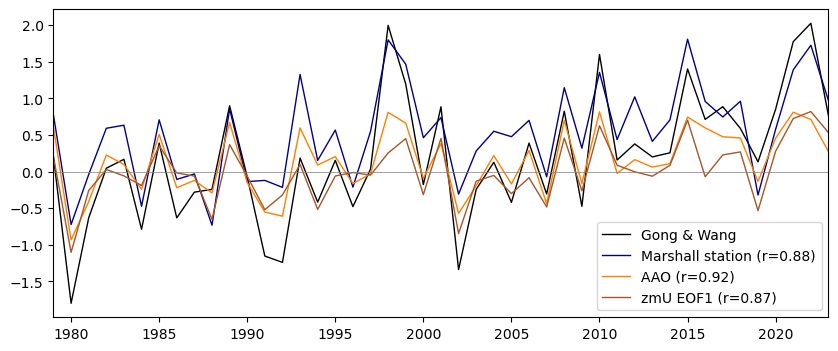

In [30]:
#line plot - with Marshall and AAO index offset by mean over 1981-2010 
#(pffset done to keep zero consistent with Gong & Wang climatology period 1981-2010 - Marshall and AAO otherwise consistent with download data)

plt.figure(figsize = (10,4))
ax = plt.gca()

Year = SAM.index
GW = SAM['SAM_GW']
Marshall = SAM['SAM_Marshall_offset']
AAO = SAM['CPC_AAO_offset']
zmU = SAM['s_pc_EOF1']

ax.plot(Year, GW, color='black', linewidth=1)
ax.plot(Year, Marshall, color='darkblue', linewidth=1)
ax.plot(Year, AAO, color='#ff7f00', linewidth=1)
ax.plot(Year, zmU, color='#a65628', linewidth=1)

ax.axhline(y=0,color = 'grey', linewidth = 0.5)

#ax.legend(['Gong & Wang','Marshall station', 'AAO', 'eof'],bbox_to_anchor = (1,1),loc = 'upper left' ) #legend outside
ax.legend(['Gong & Wang','Marshall station (r=0.88)', 'AAO (r=0.92)', 'zmU EOF1 (r=0.87)'],loc = 'lower right' ) #legend lower right inside plot

ax.set_xlim(1979,2023)
#plt.savefig('Figure1_SAM_index_timeseries_comparison.jpg')
#plt.savefig('Figure1_SAM_index_timeseries_comparison.pdf')

plt.show()